# TASK 1

# Data Download & Pre-processing VDJdb

# a) Open the following link and download zip file which contains the original dataset and all    other files related to it.
     https://github.com/antigenomics/vdjdb-db/releases/tag/2023-06-01
     
# b) Load the libraries & packages

## 1. Load the libraries & packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import StandardScaler


In [3]:
vdjdb_df = pd.read_csv('vdjdb.txt',sep='\t')

In [4]:
vdjdb_df.head(10)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVKASGSRLT"", ""cdr3_old"": ""CAVKASGSR...",2,sort,sanger,yes,yes
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...",2,sort,sanger,no,no
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2,sort,sanger,no,no
9,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEQGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no


In [5]:
datatype_df = pd.DataFrame(columns=['Column Name', 'Data Type'])

for col in vdjdb_df.columns:
    datatype = type(vdjdb_df[col][0])
    datatype_df = pd.concat([datatype_df, pd.DataFrame({'Column Name': [col], 'Data Type': [datatype]})], ignore_index=True)

print(datatype_df)

         Column Name              Data Type
0         complex.id  <class 'numpy.int64'>
1               gene          <class 'str'>
2               cdr3          <class 'str'>
3             v.segm          <class 'str'>
4             j.segm          <class 'str'>
5            species          <class 'str'>
6              mhc.a          <class 'str'>
7              mhc.b          <class 'str'>
8          mhc.class          <class 'str'>
9    antigen.epitope          <class 'str'>
10      antigen.gene          <class 'str'>
11   antigen.species          <class 'str'>
12      reference.id          <class 'str'>
13            method          <class 'str'>
14              meta          <class 'str'>
15           cdr3fix          <class 'str'>
16       vdjdb.score  <class 'numpy.int64'>
17        web.method          <class 'str'>
18    web.method.seq          <class 'str'>
19    web.cdr3fix.nc          <class 'str'>
20  web.cdr3fix.unmp          <class 'str'>


In [6]:
vdjdb_df.info()
vdjdb_df.isna().sum()
vdjdb_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   complex.id        92771 non-null  int64 
 1   gene              92771 non-null  object
 2   cdr3              92771 non-null  object
 3   v.segm            92670 non-null  object
 4   j.segm            91626 non-null  object
 5   species           92771 non-null  object
 6   mhc.a             92771 non-null  object
 7   mhc.b             92771 non-null  object
 8   mhc.class         92771 non-null  object
 9   antigen.epitope   92771 non-null  object
 10  antigen.gene      92709 non-null  object
 11  antigen.species   92771 non-null  object
 12  reference.id      91260 non-null  object
 13  method            92771 non-null  object
 14  meta              92771 non-null  object
 15  cdr3fix           92771 non-null  object
 16  vdjdb.score       92771 non-null  int64 
 17  web.method  

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1145
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64

# 2. Drop irrelevant columns

Few columns give information about the method of sequencing (method, web.method.seq), sources of data (reference.id), method of collecting data (web.method), does cdr3 sequence needs fixing(cdr3fix) etc.
All these columns help calculate **vdjdb.score**

Hence, we delete the following columns:
1. reference.id
2. method
3. meta
4. cdr3fix
5. web.method  
6. web.method.seq
7. web.cdr3fix.nc
8. web.cdr3fix.unmp

In [7]:
vdjdb_data = vdjdb_df.iloc[:, list(range(0, 12)) + [16]]
vdjdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 9.2+ MB


# 3 Drop NULL values

The 101, 1145, 62 records of null value are dropped from columns v.segm, j.segm and antigen.gene

In [8]:
vdjdb_data.isnull().sum()

complex.id            0
gene                  0
cdr3                  0
v.segm              101
j.segm             1145
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
dtype: int64

In [9]:
nulls = vdjdb_data.isnull().any(axis=1).sum()
print(f"Null records all over the dataset: {nulls}")

Null records all over the dataset: 1221


# 4 Counting unique/distinct values

In [10]:
from matplotlib.ticker import MultipleLocator

def distinct_values_count(df, width):
    distinct_counts = df.nunique()
    plt.figure(figsize=(5, 5))
    plt.bar(range(len(distinct_counts)),distinct_counts, width=width, color = 'green')
    plt.gca().yaxis.set_major_locator(MultipleLocator(5000))
    plt.title('Distinct Value Counts across all Columns')
    plt.xlabel('Column Names')
    plt.ylabel('Distinct Value Range')
    plt.xticks(range(len(distinct_counts)), distinct_counts.index, rotation=45)

    for i, v in enumerate(distinct_counts):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

    return distinct_counts

complex.id         30595
gene                   2
cdr3               68994
v.segm               224
j.segm                71
species                3
mhc.a                119
mhc.b                 45
mhc.class              2
antigen.epitope     1169
antigen.gene         268
antigen.species       42
vdjdb.score            4
dtype: int64

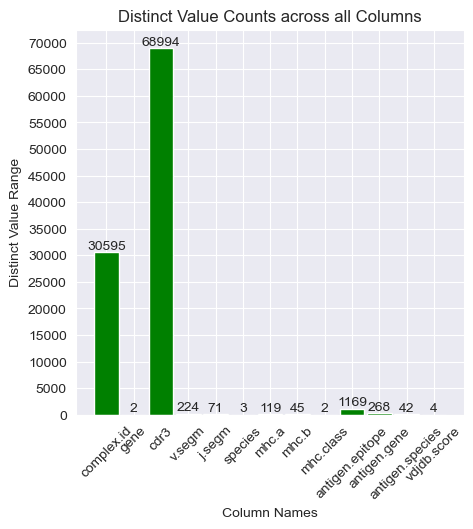

In [11]:
distinct_values_count(vdjdb_data, 0.9)

cdr3               68994
antigen.epitope     1169
dtype: int64

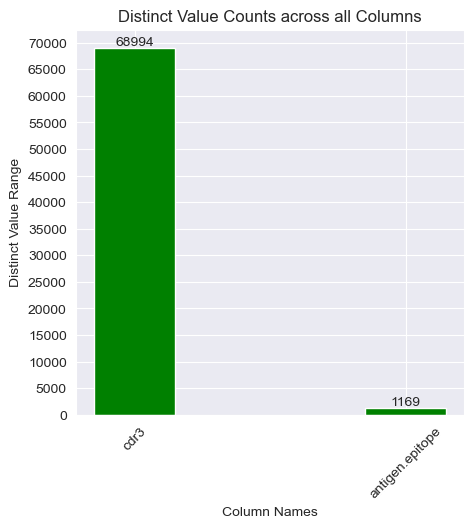

In [12]:
distinct_values_count(vdjdb_data[['cdr3', 'antigen.epitope']], 0.3)

# 5 complex.id

Records with a complex.id of zero lack either an alpha or beta chain. We tally all identifiers and verify if non-zero values correspond to complete alpha-beta pairings by checking for their duplication.

In [19]:
complex_id_zero = vdjdb_data[vdjdb_data['complex.id'] == 0]
complex_id_zero_count = complex_id_zero['complex.id'].count()
complex_id_zero_alpha_count = complex_id_zero[complex_id_zero['gene'] == 'TRA']['gene'].count()
complex_id_zero_beta_count = complex_id_zero[complex_id_zero['gene'] == 'TRB']['gene'].count()

complex_id_zero_distinct = complex_id_zero.drop_duplicates().shape[0]
complex_id_zero_nulls = complex_id_zero.isnull().any(axis=1).sum()
print("\n   zero complex.id count: {}".format(complex_id_zero_count),
      "\n   complex.id alpha count: {}".format(complex_id_zero_alpha_count),
      "\n   complex.id beta count: {}".format(complex_id_zero_beta_count),
      "\n   number of non-duplicate count: {}".format(complex_id_zero_distinct),
      "\n   number of duplicate count: {}".format(complex_id_zero_count - complex_id_zero_distinct),
      "\n   number of null count: {}".format(complex_id_zero_nulls))


complex_id_non_zero = vdjdb_data[vdjdb_data['complex.id'] != 0]
complex_id_non_zero_count = complex_id_non_zero['complex.id'].count()
complex_id_non_zero_pair_count = complex_id_non_zero['complex.id'].value_counts()
complex_id_non_zero_distinct_count = complex_id_non_zero.drop_duplicates().shape[0]
complex_id_non_zero_nulls = complex_id_non_zero.isnull().any(axis=1).sum()
print("\n   number of non-zero complex.id: {}".format(complex_id_non_zero_count),
      "\n   number of non-duplicate count: {}".format(complex_id_non_zero_distinct_count),
      "\n   number of duplicate count: {}".format(complex_id_non_zero_count - complex_id_non_zero_distinct_count))

pairs_check = all(complex_id_non_zero_pair_count == 2)
if pairs_check:
    print("\n   number of the paired non-zero values: {}".format(len(complex_id_non_zero_pair_count)))
else:
    print("\n   No non-paired non-zero values. ")


complex_id_with_null = complex_id_non_zero.loc[complex_id_non_zero.isnull().any(axis=1), [
    'complex.id']]

print("\n   number of duplicate rows with null:  {}".format(complex_id_non_zero_nulls - complex_id_with_null.drop_duplicates().shape[0]))


   zero complex.id count: 31583 
   complex.id alpha count: 7455 
   complex.id beta count: 24128 
   number of non-duplicate count: 27338 
   number of duplicate count: 4245 
   number of null count: 326

   number of non-zero complex.id: 61188 
   number of non-duplicate count: 61188 
   number of duplicate count: 0

   number of the paired non-zero values: 30594

   number of duplicate rows with null:  32


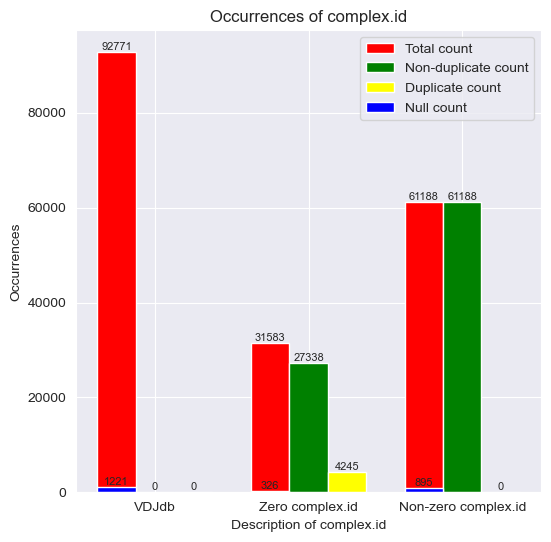

In [16]:
category = ['VDJdb', 'Zero complex.id', 'Non-zero complex.id']
occurrences = [len(vdjdb_data), complex_id_zero_count, complex_id_non_zero_count]
distinct_occurrences = [0, complex_id_zero_distinct, complex_id_non_zero_distinct_count]
duplicate_occurrences = [0, complex_id_zero_count - complex_id_zero_distinct, complex_id_non_zero_count - complex_id_non_zero_distinct_count]
null_occurrences = [nulls, complex_id_zero_nulls, complex_id_non_zero_nulls]

plt.figure(figsize=(6, 6))
bar_width = 0.25
index = range(len(category))

bar_one = plt.bar(index, occurrences, color='red', label='Total count', width=bar_width)
bar_two = plt.bar([i + bar_width for i in index], distinct_occurrences, color='green', label='Non-duplicate count', width=bar_width)
bar_three = plt.bar([i + 2 * bar_width for i in index], duplicate_occurrences, color='yellow', label='Duplicate count', width=bar_width)
bar_null = plt.bar(index, null_occurrences, color='blue', label='Null count', width=bar_width)


def labelling(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=8)

labelling(bar_one)
labelling(bar_two)
labelling(bar_three)
labelling(bar_null)

plt.xlabel('Description of complex.id')
plt.ylabel('Occurrences')
plt.title('Occurrences of complex.id')
plt.xticks([i + bar_width for i in index], category)
plt.legend()